# Introduction to Graph Analysis with `networkx`

Graph theory deals with various properties and algorithms concerned with Graphs. Although it is very easy to implement a Graph ADT in Python, we will use `networkx` library for Graph Analysis as it has inbuilt support for visualizing graphs. In future versions of `networkx`, graph visualization might be removed. When this happens, it is required to modify some parts of this chapter

## Standard `import` statement

Throughout this tutorial, we assume that you have imported `networkx` as follows

In [1]:
import networkx as nx

## Creating Graphs
Create an empty graph with no nodes and no edges.

In [2]:
G = nx.Graph()

By definition, a `Graph` is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g. a text string, an image, an XML object, another Graph, a customized node object, etc. (Note: Python's None object should not be used as a node as it determines whether optional function arguments have been assigned in many functions.)

## Nodes
The graph `G` can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started, we'll look at simple manipulations. You can add one node at a time,

In [3]:
G.add_node(1)

add a list of nodes,

In [4]:
G.add_nodes_from([2,3])

## Edges

G can also be grown by adding one edge at a time,

In [5]:
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e)  # Unpacking tuple

by adding a list of edges,

In [6]:
G.add_edges_from([(1,2),(1,3)])

we add new nodes/edges and NetworkX quietly ignores any that are already present. 

At this stage the graph G consists of 3 nodes and 3 edges, as can be seen by:

In [7]:
G.number_of_nodes()

3

In [8]:
G.number_of_edges()

3

## Accessing edges

In addition to the methods `Graph.nodes`, `Graph.edges`, and `Graph.neighbors`, iterator versions (e.g. `Graph.edges_iter`) can save you from creating large lists when you are just going to iterate through them anyway.

Fast direct access to the graph data structure is also possible using subscript notation.

Warning

Do not change the returned dict--it is part of the graph data structure and direct manipulation may leave the graph in an inconsistent state.

In [9]:
G.nodes()

[1, 2, 3]

In [10]:
G.edges()

[(1, 2), (1, 3), (2, 3)]

In [11]:
G[1]

{2: {}, 3: {}}

In [12]:
G[1][2]

{}

You can safely set the attributes of an edge using subscript notation if the edge already exists.

In [13]:
G[1][2]['weight'] = 10

In [14]:
G[1][2]

{'weight': 10}

Fast examination of all edges is achieved using adjacency iterators. Note that for undirected graphs this actually looks at each edge twice.

In [15]:
FG=nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])
for n,nbrs in FG.adjacency_iter():
    for nbr,eattr in nbrs.items():
        data=eattr['weight']
        if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [16]:
list(FG.adjacency_iter())

[(1, {2: {'weight': 0.125}, 3: {'weight': 0.75}}),
 (2, {1: {'weight': 0.125}, 4: {'weight': 1.2}}),
 (3, {1: {'weight': 0.75}, 4: {'weight': 0.375}}),
 (4, {2: {'weight': 1.2}, 3: {'weight': 0.375}})]

Convenient access to all edges is achieved with the `edges` method.

In [17]:
for (u,v,d) in FG.edges(data='weight'):
     if d<0.5: print('(%d, %d, %.3f)'%(n,nbr,d))

(4, 3, 0.125)
(4, 3, 0.375)


## Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.node and G.edge for a graph G.

### Graph attributes

Assign graph attributes when creating a new graph

In [18]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Or you can modify attributes later

In [19]:
G.graph['day']='Monday'
G.graph

{'day': 'Monday'}

### Node attributes

Add node attributes using `add_node()`, `add_nodes_from()` or G.node

In [20]:
G.add_node(1,time = '5pm')

In [21]:
G.add_nodes_from([3], time='2pm')

In [22]:
G.node[1]

{'time': '5pm'}

In [23]:
G.node[1]['room'] = 714

In [24]:
G.nodes(data=True)

[(1, {'room': 714, 'time': '5pm'}), (3, {'time': '2pm'})]

Note that adding a node to `G.node` does not add it to the graph, use `G.add_node()` to add new nodes.

### Edge Attributes

Add edge attributes using `add_edge()`, `add_edges_from()`, subscript notation, or G.edge.

In [25]:
G.add_edge(1, 2, weight=4.7 )

In [26]:
G[1][2]

{'weight': 4.7}

In [27]:
G.add_edges_from([(3,4),(4,5)], color='red')

In [28]:
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])

In [29]:
G[1][2]['weight'] = 4.7

In [30]:
G.edge[1][2]['weight'] = 4

In [31]:
G.edges(data=True)

[(1, 2, {'color': 'blue', 'weight': 4}),
 (2, 3, {'weight': 8}),
 (3, 4, {'color': 'red'}),
 (4, 5, {'color': 'red'})]

## Converting Graph to Adjacency matrix

You can use `nx.to_numpy_matrix(G)` to convert `G` to `numpy` matrix. If the graph is weighted, the elements of the matrix are weights. If an edge doesn't exsist, its value will be 0, not Infinity. You have to manually modify those values to Infinity (`float('inf')`)

In [32]:
nx.to_numpy_matrix(G)

matrix([[ 0.,  4.,  0.,  0.,  0.],
        [ 4.,  0.,  8.,  0.,  0.],
        [ 0.,  8.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.,  1.],
        [ 0.,  0.,  0.,  1.,  0.]])

In [33]:
nx.to_numpy_matrix(FG)

matrix([[ 0.   ,  0.125,  0.75 ,  0.   ],
        [ 0.125,  0.   ,  0.   ,  1.2  ],
        [ 0.75 ,  0.   ,  0.   ,  0.375],
        [ 0.   ,  1.2  ,  0.375,  0.   ]])

## Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing package and will be imported if possible

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

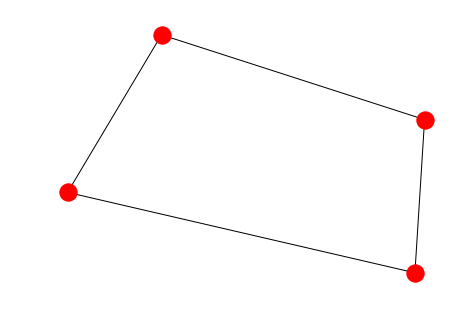

In [37]:
nx.draw(FG)

Now we shall draw the graph using graphviz layout

{1: <matplotlib.text.Text at 0x7f6057498da0>,
 2: <matplotlib.text.Text at 0x7f605749d518>,
 3: <matplotlib.text.Text at 0x7f605749dc18>,
 4: <matplotlib.text.Text at 0x7f60574a1358>}

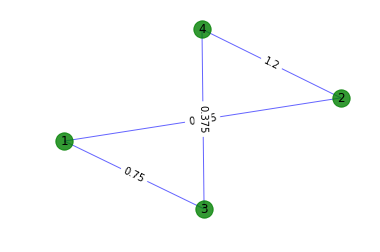

In [54]:
from networkx.drawing.nx_agraph import graphviz_layout
pos = graphviz_layout(FG)
plt.axis('off')
nx.draw_networkx_nodes(FG,pos,node_color='g',alpha = 0.8)  # draws nodes
nx.draw_networkx_edges(FG,pos,edge_color='b',alpha = 0.6)  # draws edges
nx.draw_networkx_edge_labels(FG,pos,edge_labels = nx.get_edge_attributes(FG,'weight')) # edge lables
nx.draw_networkx_labels(FG,pos) # node lables

## Going Further

We have only seen the basic graph functionalities. In addition to this, NetworkX provides many Graph Algorithms, and Many types of Graphs. Interested reader can look at [Official Documentation](https://networkx.readthedocs.io/en/stable/)